Importing Libraries

In [291]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import cv2 as cv
from sys import getsizeof
from scipy.signal import find_peaks

$ \Large{\text{Given Image}}$

Visualisation of the Image

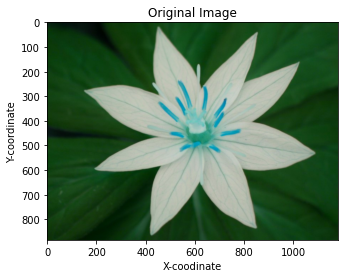

In [292]:
img = cv.imread('flower.png')
plt.imshow(img);
plt.xlabel('X-coodinate');
plt.ylabel('Y-coordinate');
plt.title('Original Image');
size_img = getsizeof(img) # Storing the size of the image
store_img = img.copy()

Creating Contours

In [293]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Find the contour of the binary image
contours, hierarchy = cv.findContours(
    thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[1:2] # Parameter to be changed according to requirement

print(cnt[0].shape)  # This tells us the number of points that are involved in the contour

(2088, 1, 2)


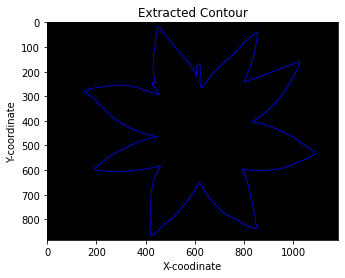

In [294]:
canvas = np.zeros_like(img)
cv.drawContours(canvas, cnt, -1, (0, 0, 255), 2)
plt.imshow(canvas); 
plt.xlabel('X-coodinate');
plt.ylabel('Y-coordinate');
plt.title('Extracted Contour');

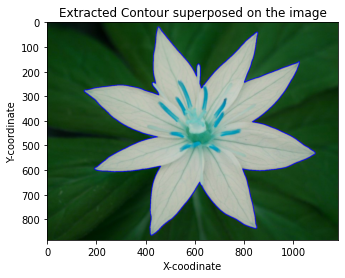

In [295]:
cv.drawContours(img, cnt, -1, (0, 0, 255), 2)
plt.imshow(img);
plt.xlabel('X-coodinate');
plt.ylabel('Y-coordinate');
plt.title('Extracted Contour superposed on the image'); #This confirms that the contours are perfect

Extracting the Centre of the Flower:\
The process involves finding the rightmost, leftmost, topmost and bottommost extremes of the flower. \
A circle is then fit accross the 4 points. This gives us the required center coordinates.


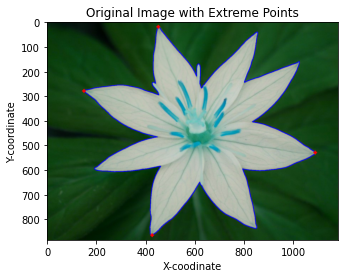

In [296]:
all_points_contour = np.squeeze(cnt[0], axis=1)
x_max_pos = np.argmax(all_points_contour[:,0])
x_min_pos = np.argmin(all_points_contour[:,0])
y_max_pos = np.argmax(all_points_contour[:,1])
y_min_pos = np.argmin(all_points_contour[:,1])

right_most = all_points_contour[x_max_pos]
left_most = all_points_contour[x_min_pos]
top_most = all_points_contour[y_max_pos]
bottom_most = all_points_contour[y_min_pos]
extreme_points = np.array([right_most, left_most, top_most, bottom_most])

for point in extreme_points:
    cv.drawMarker(img, point, (255,0,0), markerSize=10, thickness=5)
    

extreme_points = np.transpose(extreme_points)
plt.imshow(img);
plt.xlabel('X-coodinate');
plt.ylabel('Y-coordinate');
plt.title('Original Image with Extreme Points'); # This confirms that extreme points are reasonable

In [297]:
def test_func(point,a,b,r):
    return (point[0]-a)**2 + (point[1]-b)**2 - r**2

y_data = np.zeros(4)
params, _ = optimize.curve_fit(test_func, extreme_points, y_data, p0=[600, 500, 500])
print(params)

[615.2906409  443.3117375  473.10713511]


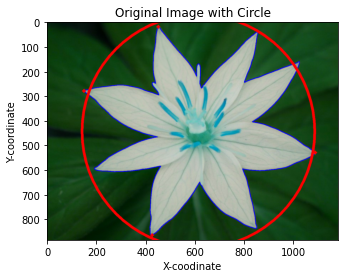

In [298]:
cv.circle(img, (int(params[0]), int(params[1])), int(params[2]), color = (255, 0, 0)
          , thickness=10)
plt.imshow(img);
plt.xlabel('X-coodinate');
plt.ylabel('Y-coordinate');
plt.title('Original Image with Circle'); # This confirms that the circle is reasonable

Fitting $R(\theta)$

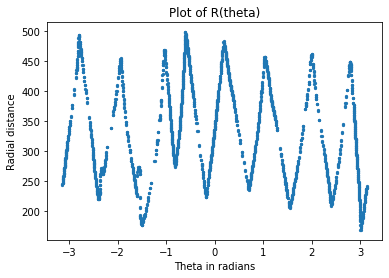

In [299]:
centre_coords = np.array([params[0], params[1]])
theta = np.arctan2((all_points_contour[:,1]- centre_coords[1]),(all_points_contour[:,0] - centre_coords[0]))
R = np.sqrt((all_points_contour[:,0] - centre_coords[0])**2 + (all_points_contour[:,1] - centre_coords[1])**2)
plt.scatter(theta, R, s=5);
plt.xlabel('Theta in radians');
plt.ylabel('Radial distance');
plt.title('Plot of R(theta)');

In [300]:
def test_func(theta,a,b,c, d):
    temp = theta*180/np.pi % a
    return b*np.abs(temp - c) - d

params, _ = optimize.curve_fit(test_func, theta, R, p0=[45, 300, 20, 500])
print(params)

[  44.7160228    -8.27543105   18.71197469 -443.10816196]


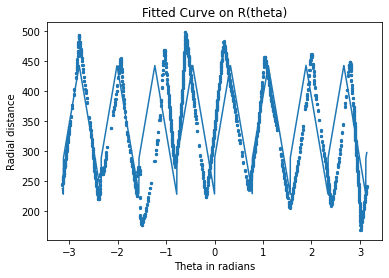

In [301]:
theta_cont = np.linspace(-np.pi, np.pi, 2000)
plt.plot(theta_cont,test_func(theta_cont,params[0], params[1], params[2], params[3]))
plt.scatter(theta, R, s=5);
plt.xlabel('Theta in radians');
plt.ylabel('Radial distance');
plt.title('Fitted Curve on R(theta)');

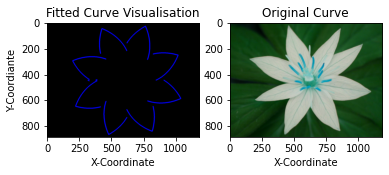

In [302]:
r_final = test_func(theta_cont,params[0], params[1], params[2], params[3])
plt.subplot(1,2,1);
final_canvas = np.zeros_like(img)
final_coords = np.array([centre_coords[0] + r_final*np.cos(theta_cont), centre_coords[1] + r_final*np.sin(theta_cont)])
final_coords = np.transpose(final_coords).astype(int)
for point in final_coords:
    cv.drawMarker(final_canvas, point, (0,0,255), markerSize=5, thickness=4)
plt.imshow(final_canvas);
plt.xlabel('X-Coordinate');
plt.ylabel('Y-Coordiante');
plt.title('Fitted Curve Visualisation');
plt.subplot(1,2,2)
plt.imshow(store_img)
plt.xlabel('X-Coordinate');
plt.ylabel('Y-Coordiante');
plt.title('Original Curve');


Calculating Compression Ratio

In [303]:
size_compressed = getsizeof(params)
compression_ratio = size_img/size_compressed
print('The compression ratio is = ', compression_ratio)

The compression ratio is =  23069.5


Symmetry of the Image

In [304]:
r_peak = test_func(theta_cont,params[0], params[1], params[2], params[3])
peaks, prop = find_peaks(r_peak, threshold=0)
final_symmetry = len(peaks)
print('Symmetry of the Image is ', final_symmetry, ' -fold')

Symmetry of the Image is  8  -fold


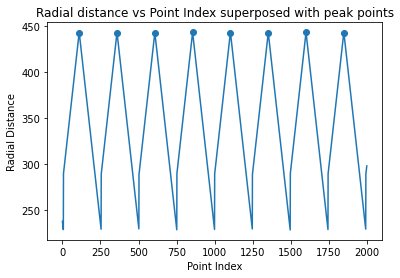

In [305]:
plt.scatter(peaks, r_peak[peaks])
plt.plot(r_peak) # Confirmation that the Peaks are rightly caught by the curve
plt.xlabel('Point Index');
plt.ylabel('Radial Distance');
plt.title('Radial distance vs Point Index superposed with peak points');

$\Large{\text{Test Image}}$

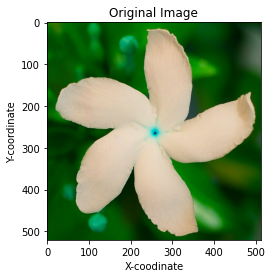

In [306]:
img = cv.imread('flower_net1.png')
plt.imshow(img);
plt.xlabel('X-coodinate');
plt.ylabel('Y-coordinate');
plt.title('Original Image');
size_img = getsizeof(img) # Storing the size of the image
store_img = img.copy()

(1189, 1, 2)


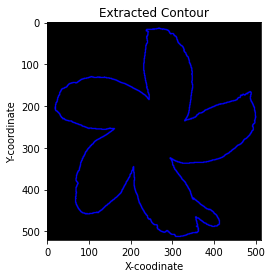

In [307]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Find the contour of the binary image
contours, hierarchy = cv.findContours(
    thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[4:5] # Parameter to be changed according to requirement

print(cnt[0].shape)  # This tells us the number of points that are involved in the contour

canvas = np.zeros_like(img)
cv.drawContours(canvas, cnt, -1, (0, 0, 255), 2)
plt.imshow(canvas); 
plt.xlabel('X-coodinate');
plt.ylabel('Y-coordinate');
plt.title('Extracted Contour');

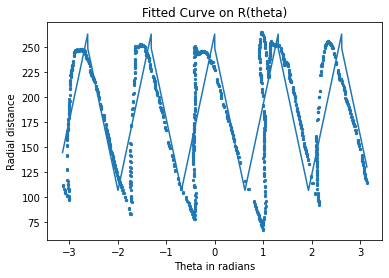

In [308]:
all_points_contour = np.squeeze(cnt[0], axis=1)
x_max_pos = np.argmax(all_points_contour[:,0])
x_min_pos = np.argmin(all_points_contour[:,0])
y_max_pos = np.argmax(all_points_contour[:,1])
y_min_pos = np.argmin(all_points_contour[:,1])

right_most = all_points_contour[x_max_pos]
left_most = all_points_contour[x_min_pos]
top_most = all_points_contour[y_max_pos]
bottom_most = all_points_contour[y_min_pos]
extreme_points = np.array([right_most, left_most, top_most, bottom_most])

for point in extreme_points:
    cv.drawMarker(img, point, (255,0,0), markerSize=10, thickness=5)
    

extreme_points = np.transpose(extreme_points)

def test_func(point,a,b,r):
    return (point[0]-a)**2 + (point[1]-b)**2 - r**2

y_data = np.zeros(4)
params, _ = optimize.curve_fit(test_func, extreme_points, y_data, p0=[250, 350, 400])

centre_coords = np.array([params[0], params[1]])
theta = np.arctan2((all_points_contour[:,1]- centre_coords[1]),(all_points_contour[:,0] - centre_coords[0]))
R = np.sqrt((all_points_contour[:,0] - centre_coords[0])**2 + (all_points_contour[:,1] - centre_coords[1])**2)

def test_func(theta,a,b,c, d):
    temp = theta*180/np.pi % a
    return b*np.abs(temp - c) - d

params, _ = optimize.curve_fit(test_func, theta, R, p0=[72, 250, 20, 250])

theta_cont = np.linspace(-np.pi, np.pi, 2000)
plt.plot(theta_cont,test_func(theta_cont,params[0], params[1], params[2], params[3]))
plt.scatter(theta, R, s=5);
plt.xlabel('Theta in radians');
plt.ylabel('Radial distance');
plt.title('Fitted Curve on R(theta)');


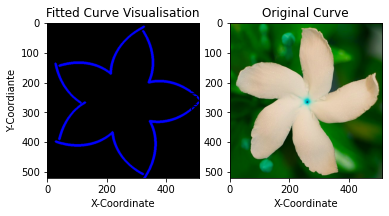

In [309]:
r_final = test_func(theta_cont,params[0], params[1], params[2], params[3])
plt.subplot(1,2,1);
final_canvas = np.zeros_like(img)
final_coords = np.array([centre_coords[0] + r_final*np.cos(theta_cont), centre_coords[1] + r_final*np.sin(theta_cont)])
final_coords = np.transpose(final_coords).astype(int)
for point in final_coords:
    cv.drawMarker(final_canvas, point, (0,0,255), markerSize=5, thickness=4)
plt.imshow(final_canvas);
plt.xlabel('X-Coordinate');
plt.ylabel('Y-Coordiante');
plt.title('Fitted Curve Visualisation');
plt.subplot(1,2,2)
plt.imshow(store_img)
plt.xlabel('X-Coordinate');
plt.ylabel('Y-Coordiante');
plt.title('Original Curve');

In [310]:
size_compressed = getsizeof(params)
compression_ratio = size_img/size_compressed
print('The compression ratio is = ', compression_ratio)

The compression ratio is =  5885.235294117647


In [311]:
r_peak = test_func(theta_cont,params[0], params[1], params[2], params[3])
peaks, prop = find_peaks(r_peak, threshold=0)
final_symmetry = len(peaks)
print('Symmetry of the Image is ', final_symmetry, ' -fold')

Symmetry of the Image is  5  -fold
